# NYU - CUSP UDP Capstone
# Topologies Master 
## Brief
This notebook 
- imports the shapefile
- imports topologies results
- merges shapefiles with topologies
- map topologies
- outputs a .csv of the results


In [ ]:
#! pip install geopandas
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import os
import requests
import shapely
import json
from fiona.crs import from_epsg
import scipy as sp
from scipy import stats
import geopy.distance
#from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
#pd.options.display.max_columns = None
DEVELOPING = False
#from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
#from evalChisq import evalChisq

In [122]:
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import Shape Files
#### Retrieved from latest results from Nov 18 (using Eva shapefiles) [https://github.com/danachermesh/udpny/tree/master/typology_final](https://github.com/danachermesh/udpny/tree/master/typology_final)

In [209]:
NYCzip=gpd.read_file('udpny_Dana/typology_final/final_typology6.shp')

In [210]:
NYCzip.columns

Index(['geoid2', 'typology', 'stcolbl', 'subreglbl', 'Municipali', 'Field1',
       'GEOid2_1', 'total_hous', 'collage__0', 'NonWhite__', 'renters__0',
       'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000',
       'total_LI_0', 'total_ho_1', 'total_LI_1', 'NonWhite_1', 'renters__9',
       'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990',
       'total_LI_9', 'total_L_10', 'total_pop_', 'total_pop1', 'total_po_1',
       'total_po_2', 'NETchange_', 'NETchange1', 'LI_mig_in_', 'LI_mig_in1',
       'LI_mig_i_1', 'employment', 'median_ren', 'median_r_1', 'median_r_2',
       'median_r_3', 'median_r_4', 'median_hom', 'median_h_1', 'median_h_2',
       'med_HomeVa', 'med_Home_1', 'med_Rent_c', 'med_Rent_1', 'total_Ho_2',
       'renters__1', 'NonWhite_2', 'vli2016', 'li2016', 'mi2016', 'hmi2016',
       'hi2016', 'vhi2016', 'total_LI_2', 'total_LI_3', 'ag25up', 'ag25up_X',
       'ag25up_Y', 'bachelors', 'bachelors_', 'bachelors1', 'masters',
       'profession',

<class 'geopandas.geodataframe.GeoDataFrame'>


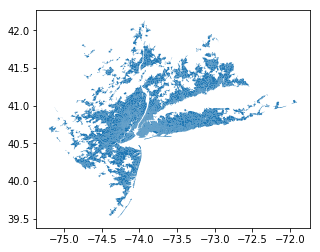

In [211]:
print(type(NYCzip))
NYCzip.plot()

# Import Latest Typologies (Nov 2018)
#### Retrieved from latest results from Nov 18 (using Eva shapefiles) [https://github.com/danachermesh/udpny/blob/master/UDPNY_results_1118_noMOEnoWater.csv](https://github.com/danachermesh/udpny/blob/master/UDPNY_results_1118_noMOEnoWater.csv)

In [212]:
Typologiespd=pd.read_csv('udpny_Dana/UDPNY_results_1118_noMOEnoWater.csv')
Typologies = gpd.GeoDataFrame(Typologiespd)

In [213]:
Typologies.tail(2)

,GEOID,Typology
5938,9011660102,MHI - Displacement of LI hh - Ongoing Exclusion
5939,9003405600,LI - Not Losing Low-Income Households


In [214]:
NYCzip.rename(columns={"geoid2": "GEOID"},inplace=True)
cols = ['GEOID','Typology']
Typologiesgdp = Typologies.loc[:,cols]
NYCzip.GEOID = NYCzip.GEOID.astype(int)
type(NYCzip.GEOID[0])

numpy.int64

In [215]:
cols = ['GEOID','geometry']
NYCzipgdp = NYCzip.loc[:,cols]
NYCzipgdp.tail(2)

,GEOID,geometry
5372,0,(POLYGON ((-74.10601926206773 40.2747732524135...
5373,0,POLYGON ((-74.15170599998963 40.71687499996914...


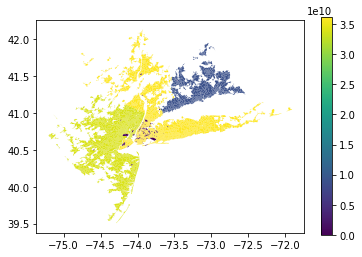

In [216]:
NYCzipgdp.plot(column='GEOID',legend = True)

## Clean Data

## Clean Typologies

In [219]:

#NYCzipgdp.isnull().sum()
Typologiesgdp.isin([0]).sum()


GEOID       0
Typology    0
dtype: int64

In [220]:
Typologiesgdp.isnull().sum()

GEOID       0
Typology    0
dtype: int64

In [221]:
print(len(Typologiesgdp.GEOID.unique()))
Typologiesgdp.dropna(inplace=True)
Typologiesgdp.shape

5940


(5940, 2)

In [222]:
Typologiesgdp =Typologiesgdp.drop_duplicates()

In [223]:
Typologiesgdp.shape

(5940, 2)

In [224]:
NYCzipgdp.shape

(5374, 2)

In [226]:
NYCzipgdp.isnull().sum()

GEOID       0
geometry    0
dtype: int64

In [225]:
#NYCzipgdp.isnull().sum()
#NYCzipgdp.isin([0]).sum()
NYCzipgdp.shape

(5374, 2)

In [ ]:
NYCzipgdp.isnull().sum()
len(NYCzipgdp.GEOID.unique())

NYCzipgdp.dropna(inplace=True)
NYCzipgdp =NYCzipgdp.drop_duplicates()
NYCzipgdp.shape


In [180]:
merged = NYCzipgdp.merge(Typologiesgdp,on='GEOID',how='inner')

In [181]:
print(type(merged))
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,GEOID,geometry,Typology
0,36005038900,POLYGON ((-73.88182999996205 40.85745500006298...,LI - Ongoing Displacement of Low- Income House...
1,36103190705,(POLYGON ((-72.41516799995586 40.8921520000585...,LI - Ongoing Displacement of Low- Income House...


In [184]:
mergedgpd.crs = from_epsg(4326)
mergedgpd.crs

In [185]:
mergedgpd.to_crs(epsg=2263, inplace = True)
mergedgpd.crs

{'init': 'epsg:2263', 'no_defs': True}

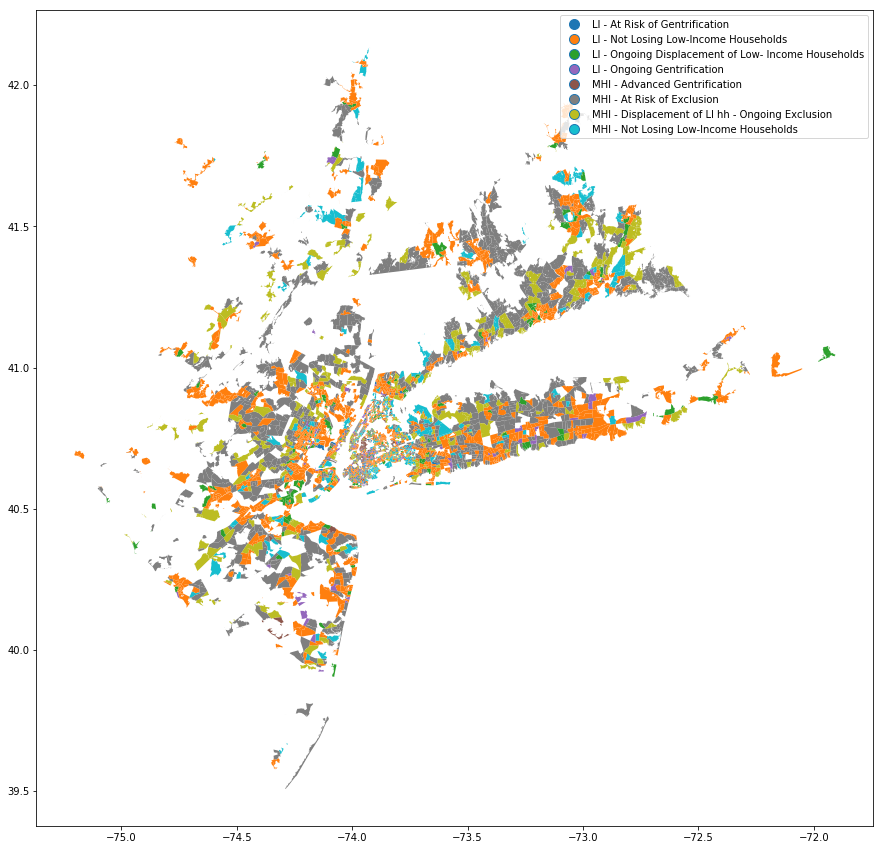

In [186]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd.plot(column='Typology',legend = True, ax=ax)

In [190]:
mergedgpd.to_csv('UDPNY_shapefiles&typologies.csv')